# Load in packages

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# remove "future" warnings
warnings.simplefilter(action="ignore", category= FutureWarning)

# Read in dataset

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

<hr>

# <center>Objective 1</center>
## <center>Business Understanding:</center>

<hr>

###  <span style = "color:blue"> A) Describe the purpose of the data set you selected (why was it collected in the first place?).</span>

#### - The data (fictional) is comprised of scores from three tests of students at a public school along with a variety of personal and socio-economic factors which may contain interaction effects. 

#### - We assume that this data was collected to identitfy potential relationships between personal and socio-economic factors that could help to predict and better understand which factors affect test scores most. With this knowledge educators, parents and students can focus their attention towards variables which can potentially help students earn higher testing scores.  

###  <span style = "color:blue">B) Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?</span>

#### - The importance of student education and testing scores are of the utmost importance. Education is the foundation upon which students will build their future on. If we are able to identify factors that could assist in making a more efficient learning and testing experiece it will impact the future positively for many students.

#### - We will know if we have mined useful knowledge from the dataset if we are able to identify patterns and significant relationships that help us in identifying student performance factors.


### <span style = "color:blue">C) How would you measure the effectiveness of a good prediction algorithm? Be specific.</span>

#### - A good prediction algorithm will be one that not only allows us to accurately predict test scores for given inputs, but one that will allow us to obtain interpreable results that we can use to better understand to what extent each factor has an effect on testing scores. Understanding which key relationships that lie within our data will help staff, family, and students identify actionable opportunitites in which interventions and support can be provided.

<hr>

# <center>Objective 2</center>

## <center>Data Understanding</center>

<hr>

### Data Conversion
- Becuase we have many categorical variables... we will anticipate the need for a data conversion but keep a separate df so that can can explore changes between the two. 

In [4]:
# new dfs with/without object type
df_obj = df.select_dtypes(include = "object")
df_num = df.select_dtypes(exclude = "object")

# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")
    
    # creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)

# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

# viewing new df. 
new_df

Unique values in column 'Gender':['female' 'male']
Unique values in column 'EthnicGroup':[nan 'group C' 'group B' 'group A' 'group D' 'group E']
Unique values in column 'ParentEduc':["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
Unique values in column 'LunchType':['standard' 'free/reduced']
Unique values in column 'TestPrep':['none' nan 'completed']
Unique values in column 'ParentMaritalStatus':['married' 'single' 'widowed' nan 'divorced']
Unique values in column 'PracticeSport':['regularly' 'sometimes' 'never' nan]
Unique values in column 'IsFirstChild':['yes' 'no' nan]
Unique values in column 'TransportMeans':['school_bus' nan 'private']
Unique values in column 'WklyStudyHours':['< 5' '5 - 10' '> 10' nan]


,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_bachelor's degree,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,3.0,71,71,74,0,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,0
1,0.0,69,90,88,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,4.0,87,93,91,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
3,1.0,45,56,42,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0.0,76,78,75,1,0,1,0,0,0,...,1,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2.0,59,61,65,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
30637,1.0,58,53,51,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
30638,1.0,61,70,67,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
30639,3.0,82,90,93,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


### <span style = "color:blue">A) Describe the meaning and type of data (Scale, Values, etc.) for each attribute in the data file.</span>

### Meaning / Description of Data: 

    1) Gender: Gender of the student (male/female)
    2) EthnicGroup: Ethnic group of the student (group A to E)
    3) ParentEduc: Parent(s) education background (from some_highschool to master's degree)
    4) LunchType: School lunch type (standard or free/reduced)
    5) TestPrep: Test preparation course followed (completed or none)
    6) ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
    7) PracticeSport: How often the student parctice sport (never/sometimes/regularly))
    8) IsFirstChild: If the child is first child in the family or not (yes/no)
    9) NrSiblings: Number of siblings the student has (0 to 7)
    10) TransportMeans: Means of transport to school (schoolbus/private)
    11) WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
    12) MathScore: math test score(0-100)
    13) ReadingScore: reading test score(0-100)
    14) WritingScore: writing test score(0-100)


###  Original (as-is) Data Types:
    1) Gender: object
    2) EthnicGroup: object
    3) ParentEduc: object
    4) LunchType: object
    5) TestPrep: object
    6) ParentMaritalStatus: object
    7) PracticeSport: object
    8) IsFirstChild: object
    9) NrSiblings: float64
    10) TransportMeans: object
    11) WklyStudyHours: object
    12) MathScore: int64
    13) ReadingScore: int64
    14) WritingScore:int64
    
    object = column containing a python object such as strings, lists, or dictionaries.
    int64 = column containing integer values
    float64 = column containing floating-point values (decimal numbers)

### Scale/Values Etc:

    1)Gender (male/female)
    2)Ethnic Group (group A to E)
    3)Parent Educ (from some_highschool to master's degree)
    4)Lunch Type (standard or free/reduced)
    5)Test Prep (completed or none)
    6)Parent Marital Status (married/single/widowed/divorced)
    7)Practice Sport (never/sometimes/regularly)
    8)Is First Child (yes/no)
    9)Nr Siblings (0 to 7)
    10)Transport Means (schoolbus/private)
    11)Wkly Study Hours (less that 5hrs; between 5 and 10hrs; more than 10hrs)
    12)Math Score (0-100)
    13)Reading Score (0-100)
    14)Writing Score (0-100)

### <span style = "color:blue">B) Verify the data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be. Specific.</span>

### - Missing Values:

    - The dataset contains many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".
    
    - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given reponses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered. 
    
    - The missing data will be handled on a case by case basis. 
   

### - Missing Values - Potential Reasonings:

    - Ethnic Group: This could be result of not fitting into Group A-E, or a choice to not provide the information. or truly missing data.    
    
    - Parent Edu: This could be a result of not fitting into the specific groups (having a PhD for example), or a choice not to provide the information. or truly missing data.    
    
     - TestPrep: This is likely to be a result of not fitting into the specific groups (maybe being "in progress", or "started"/"some"). The reasoning is that this is (likley) not a controversial or discriminatory question in nature and would leave us with a reasonable assumption. 
        
     - ParentMartitalStatus: This is likely to be a result of choosing to not offer a response, or truly missing data. (additionally there is the potential for this to be due to not having the answer choice "never married" meaning the parents are together but never married.)
     
     - Practice Sport: This could be a result of not fitting into a specific group (there is no answer for "not in sports", or addressing other extra cirrcular activities, etc).  
     
     - Is First Child: likley to be missing data? or twins / have a "step" sibling of same age? 
     
     - Transport Means: can be missing data or likely to be result of not fitting into the specific group (no walking/biking option)
     
     - Wkly Study Hours: likely to be missing data since the scale of options is covered. 
     

### - Missing Values - Proposed Solutions

    - Ethnic Group: nan = not_specified
    - Parent Edu: nan = not_specified
    - Test Prep: nan = not_specified
    - Parent Martital Status: nan = not_specified
    - Practice Sport: nan = not_specified **making up 2 percent of missing values it's possible we can drop the rows if we determine an adequate threshold of missing rows to be allowed for dropping.**
    - Is First Child:  **making up 2 percent of missing values it's possible we can drop the rows if we determine an adequate threshold of missing rows to be allowed for dropping.**
    - Transport means: nan = not_specified
    - Wkly Study Hours: nan = no_study?

In [5]:
# observing missing data
df.isnull()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30637,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30638,False,True,False,False,False,False,False,False,False,False,False,False,False,False
30639,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# missing data
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# percentage of missing data
100 * df.isnull().sum() / len(df)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [8]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [9]:
percent_nan = percent_missing(df)

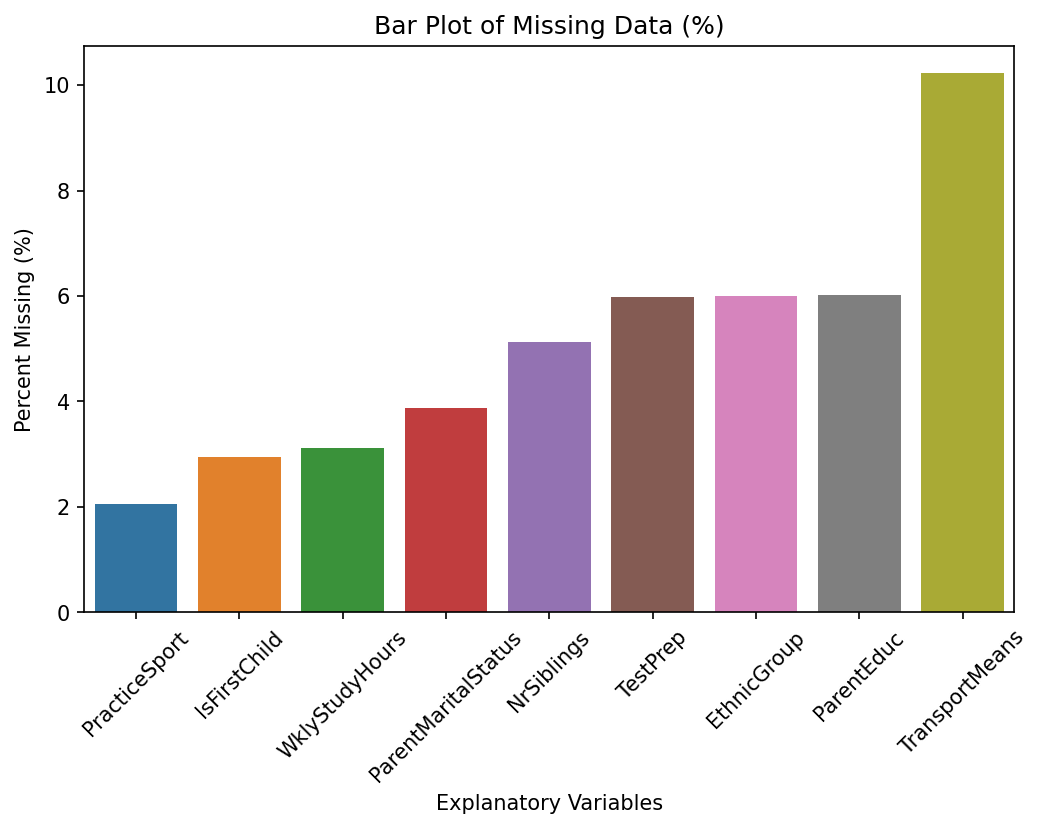

In [10]:
# plot of missing data (percentage) 
plt.figure(figsize= (8,5), dpi = 150)
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.title("Bar Plot of Missing Data (%)")
plt.xlabel("Explanatory Variables")
plt.ylabel("Percent Missing (%)")
plt.xticks(rotation = 45);

### - Duplicate Data

We do not appear to have duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

In [11]:
# viewing duplicated data rows/cols
duplicate_sum = df.duplicated().sum()
print("Total Duplicated Rows", duplicate_sum)

duplicate_sum_column = df.duplicated(). sum(axis =0)
print("Total Duplicated Columns", duplicate_sum_column)

Total Duplicated Rows 0
Total Duplicated Columns 0


### - Outliers

In [12]:
def find_IQR(df,x):
    # IQR
    Q1 = np.percentile(df[x], 25)
    Q3 = np.percentile(df[x], 75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [13]:
# Reading IQR
Q1, Q3, IQR = find_IQR(df, "ReadingScore")

# Upper Bound
reading_upper=Q3+1.5*IQR
readingupper_array=df[np.array(df["ReadingScore"]>=reading_upper)]

readingupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [14]:
# Lower bound
reading_lower=Q1-1.5*IQR
readinglower_array=df[np.array(df["ReadingScore"]<=reading_lower)]

readinglower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,male,group C,associate's degree,free/reduced,none,married,sometimes,no,1.0,NaN,5 - 10,27,26,23
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30412,male,group C,some high school,free/reduced,none,single,regularly,no,NaN,private,5 - 10,33,25,29


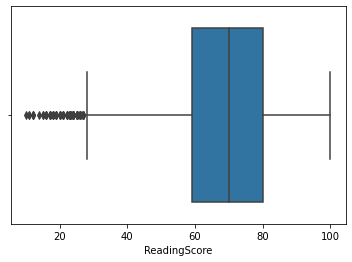

In [15]:
sns.boxplot(df["ReadingScore"])
plt.show()

In [16]:
# Reading IQR
Q1, Q3, IQR = find_IQR(df, "MathScore")

# Upper Bound
math_upper=Q3+1.5*IQR
mathupper_array=df[np.array(df["MathScore"]>=math_upper)]

mathupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [17]:
# Math Lower bound
math_lower=Q1-1.5*IQR
mathlower_array=df[np.array(df["MathScore"]<=math_lower)]

mathlower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
136,female,group C,some college,free/reduced,none,single,regularly,yes,1.0,school_bus,< 5,21,38,33
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
751,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,female,group C,some college,free/reduced,none,single,sometimes,yes,3.0,private,NaN,11,39,34
28597,female,group D,high school,free/reduced,completed,married,sometimes,yes,2.0,school_bus,> 10,9,32,32
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
29654,female,group B,associate's degree,free/reduced,none,single,sometimes,no,4.0,private,5 - 10,19,41,34


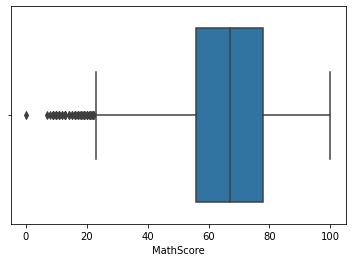

In [18]:
sns.boxplot(df["MathScore"])
plt.show()

In [19]:
# Writing IQR
Q1, Q3, IQR = find_IQR(df, "WritingScore")

# Upper Bound
write_upper=Q3+1.5*IQR
writeupper_array=df[np.array(df["WritingScore"]>=write_upper)]

writeupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [20]:
# Lower bound
write_lower=Q1-1.5*IQR
writelower_array=df[np.array(df["WritingScore"]<=write_lower)]

writelower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,female,group E,some college,free/reduced,none,NaN,sometimes,no,1.0,school_bus,5 - 10,30,32,26
29817,male,group D,high school,free/reduced,none,married,sometimes,no,1.0,private,5 - 10,33,31,22
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30478,male,group D,associate's degree,standard,none,married,sometimes,no,1.0,school_bus,< 5,32,19,20


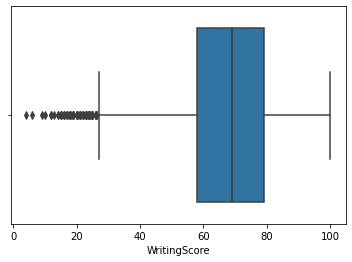

In [21]:
sns.boxplot(df["WritingScore"])
plt.show()

### <span style = "color:blue">C) Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found somthing interesting.</span>

### <span style = "color:blue">Explain the significance of the statistics run and why they are meaniningful.</span>

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


### Metrics Defined

   - **Range**: The range is the difference between the highest and the lowest values in a dataset. It gives an indication of how spread out the data is.

   - **Mode**: The mode is the value that appears most frequently in a dataset. It represents the most common or typical value in the data.

   - **Mean**: The mean is the average of all values in a dataset. It is calculated by summing up all the values and dividing by the number of values.

   - **Median**: The median is the middle value of a dataset when it is ordered from lowest to highest (or highest to lowest). It is used as a measure of central tendency when the dataset contains outliers or is not normally distributed.

   - **Standard Deviation**: The standard deviation is a measure of the spread or dispersion of a dataset. It represents how much the values in a dataset vary from the mean. A higher standard deviation indicates a larger spread of the data.

   - **Min**: The minimum value is the smallest value in a dataset.

   - **25%**: The 25th percentile, also known as the first quartile, is the value below which 25% of the data falls.

   - **50%**: The 50th percentile, also known as the median, is the middle value of the dataset.

   - **75%**: The 75th percentile, also known as the third quartile, is the value below which 75% of the data falls.

   - **Max**: The maximum value is the largest value in a dataset.

   - **Count**: The count is the total number of values in a dataset.

### <span style = "color:red"> Calculated Metrics For Our Data
- **Range**:
- **Mode**:
- **Mean**:
- **Median**:
- **Standard Deviation**:
- **Min**:
- **25%**:
- **50%**: 
- **75%**:
- **Max**:
- **Count**:

### <span style = "color:blue">D) Visualize the most important attributes appropriately (at least 5). </span>
 
 *provide an interpretation for each chart*

  *explain why each visual is appropriate.* 

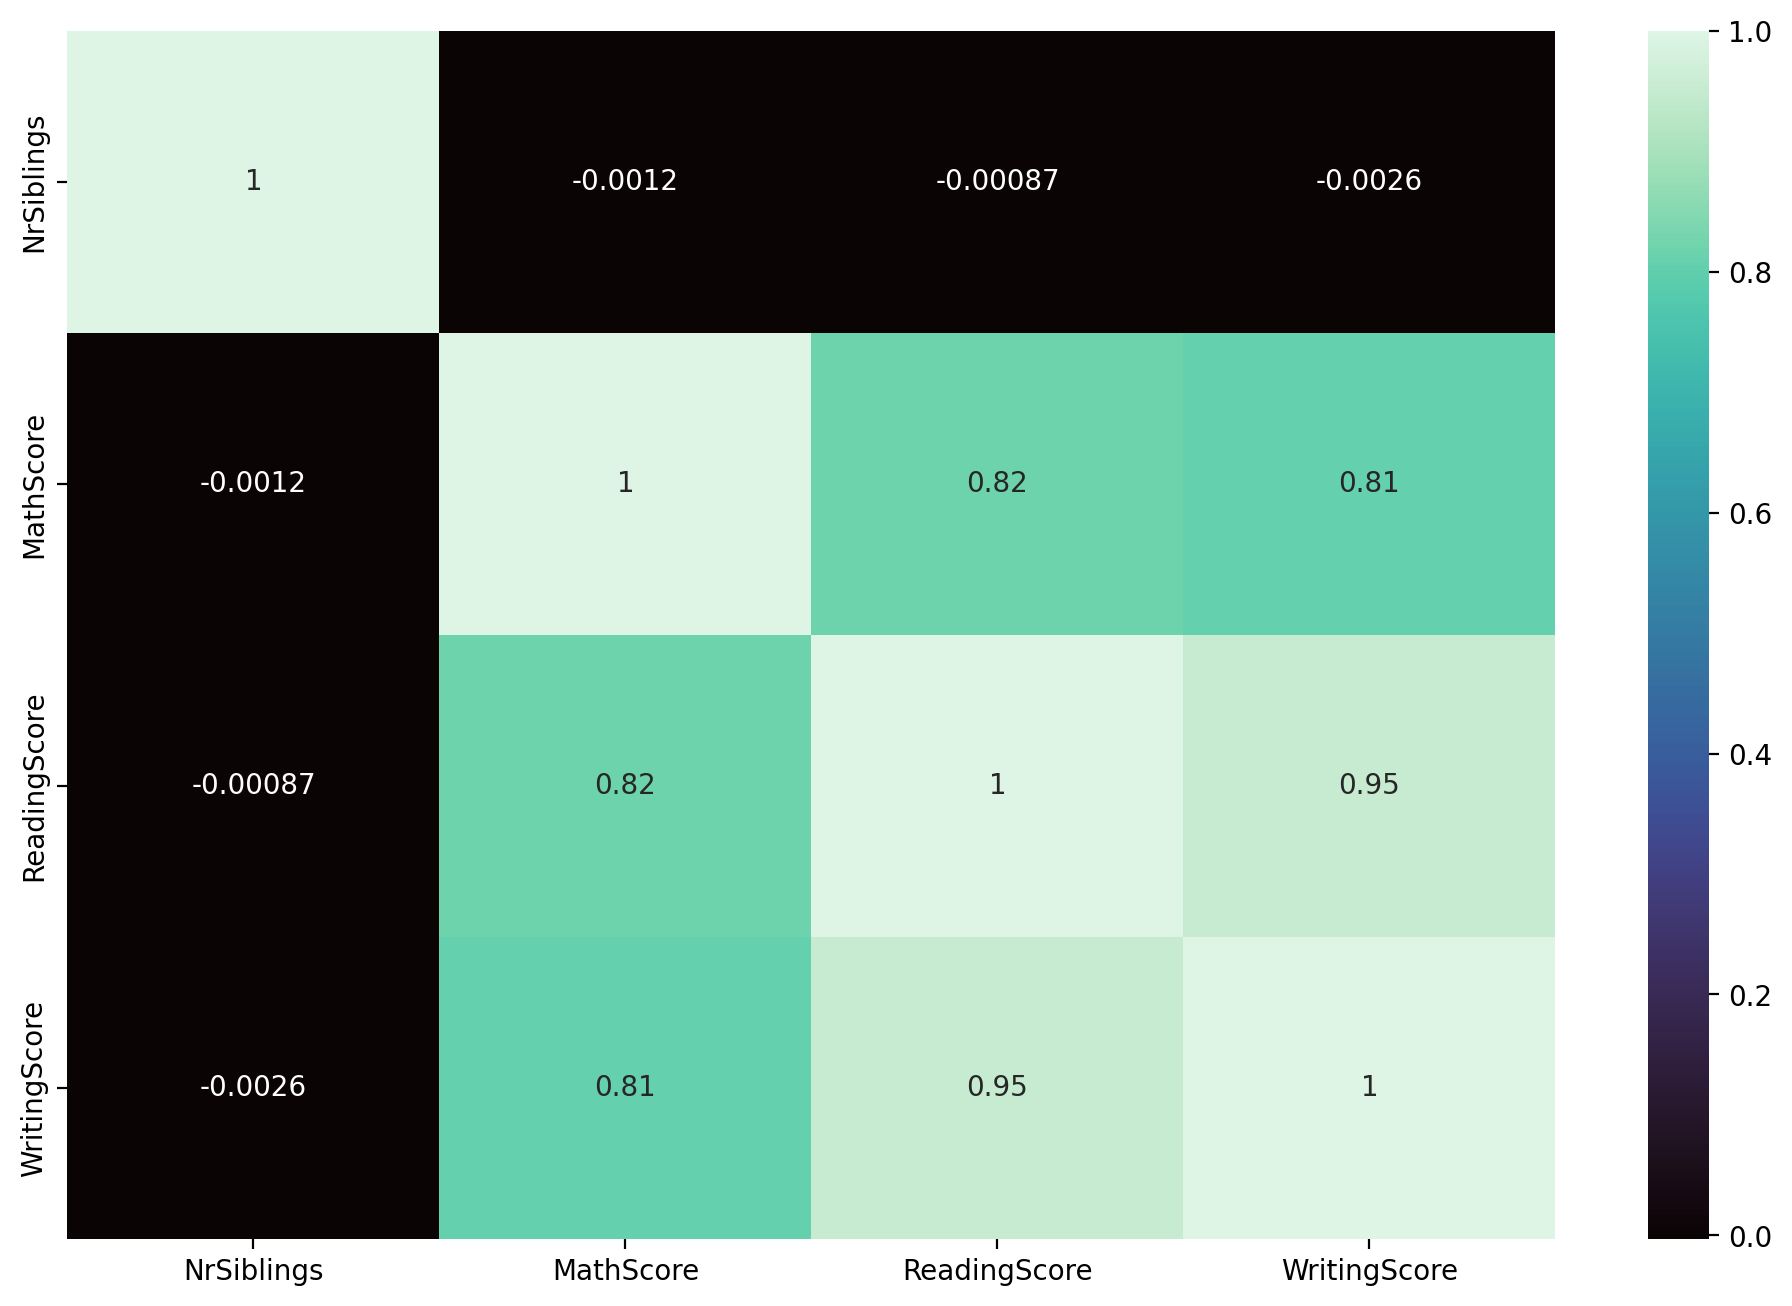

In [23]:
# raw data corr viz. 
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), cmap = "mako", annot=True)
plt.show()

<AxesSubplot:>

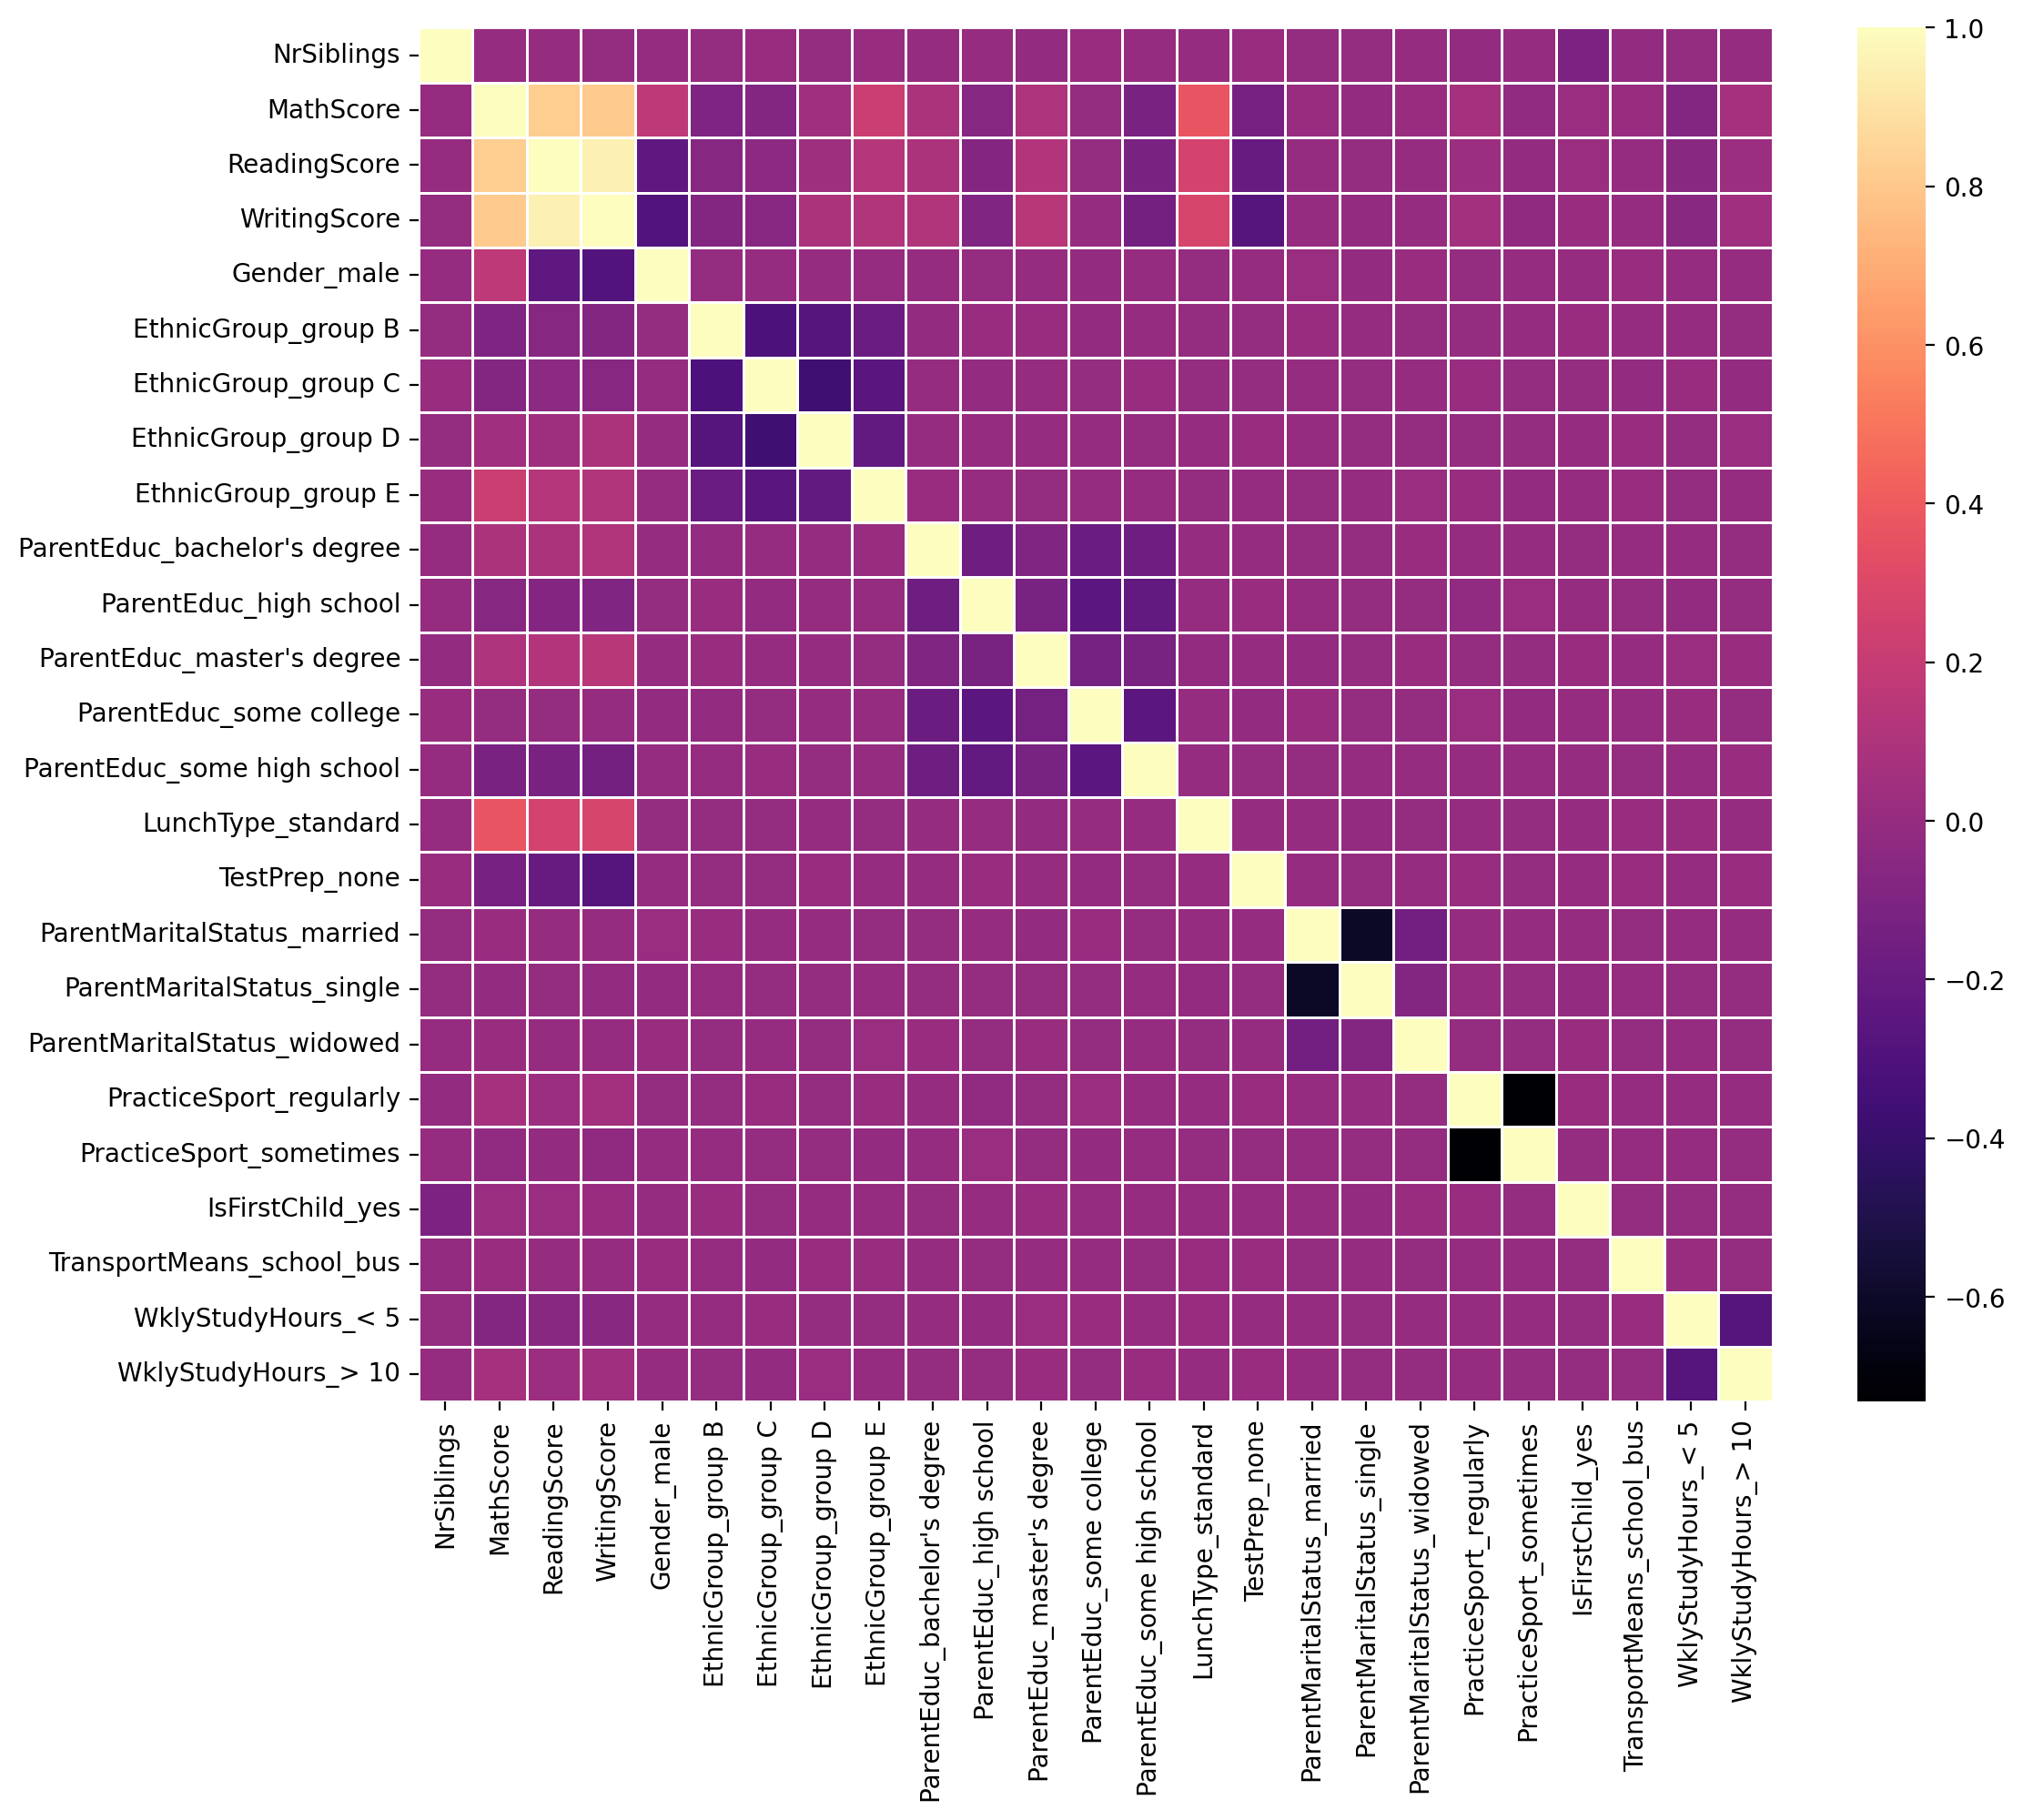

In [24]:
plt.figure(figsize=(12,10), dpi=200)
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=1)

In [25]:
new_df.corr()["WritingScore"].sort_values()

Gender_male                    -0.289312
TestPrep_none                  -0.272412
ParentEduc_some high school    -0.145231
ParentEduc_high school         -0.092659
EthnicGroup_group B            -0.079176
EthnicGroup_group C            -0.060261
WklyStudyHours_< 5             -0.052162
PracticeSport_sometimes        -0.022260
ParentMaritalStatus_single     -0.008681
NrSiblings                     -0.002554
ParentMaritalStatus_married     0.000169
ParentMaritalStatus_widowed     0.001315
ParentEduc_some college         0.002819
TransportMeans_school_bus       0.005038
IsFirstChild_yes                0.011636
WklyStudyHours_> 10             0.039798
PracticeSport_regularly         0.056602
EthnicGroup_group D             0.091160
EthnicGroup_group E             0.107477
ParentEduc_bachelor's degree    0.112119
ParentEduc_master's degree      0.136667
LunchType_standard              0.274305
MathScore                       0.807118
ReadingScore                    0.952584
WritingScore    

In [26]:
new_df.corr()["ReadingScore"].sort_values()

Gender_male                    -0.237097
TestPrep_none                  -0.199392
ParentEduc_some high school    -0.122773
ParentEduc_high school         -0.069982
EthnicGroup_group B            -0.067535
WklyStudyHours_< 5             -0.049362
EthnicGroup_group C            -0.041728
PracticeSport_sometimes        -0.009166
ParentMaritalStatus_single     -0.008195
ParentEduc_some college        -0.007045
NrSiblings                     -0.000874
ParentMaritalStatus_married     0.000901
ParentMaritalStatus_widowed     0.002603
TransportMeans_school_bus       0.004911
IsFirstChild_yes                0.014366
PracticeSport_regularly         0.028254
WklyStudyHours_> 10             0.030269
EthnicGroup_group D             0.038766
ParentEduc_bachelor's degree    0.087993
ParentEduc_master's degree      0.116293
EthnicGroup_group E             0.128716
LunchType_standard              0.258152
MathScore                       0.817825
WritingScore                    0.952584
ReadingScore    

In [27]:
new_df.corr()["MathScore"].sort_values()

TestPrep_none                  -0.132543
ParentEduc_some high school    -0.121240
EthnicGroup_group B            -0.096779
EthnicGroup_group C            -0.079503
WklyStudyHours_< 5             -0.078084
ParentEduc_high school         -0.065967
PracticeSport_sometimes        -0.018331
ParentMaritalStatus_single     -0.014035
ParentEduc_some college        -0.005746
NrSiblings                     -0.001195
ParentMaritalStatus_married     0.007115
ParentMaritalStatus_widowed     0.007399
TransportMeans_school_bus       0.007985
IsFirstChild_yes                0.015243
EthnicGroup_group D             0.041074
PracticeSport_regularly         0.061482
WklyStudyHours_> 10             0.062945
ParentEduc_bachelor's degree    0.089675
ParentEduc_master's degree      0.100001
Gender_male                     0.162391
EthnicGroup_group E             0.221775
LunchType_standard              0.367942
WritingScore                    0.807118
ReadingScore                    0.817825
MathScore       

### Gender / Test Score Viz

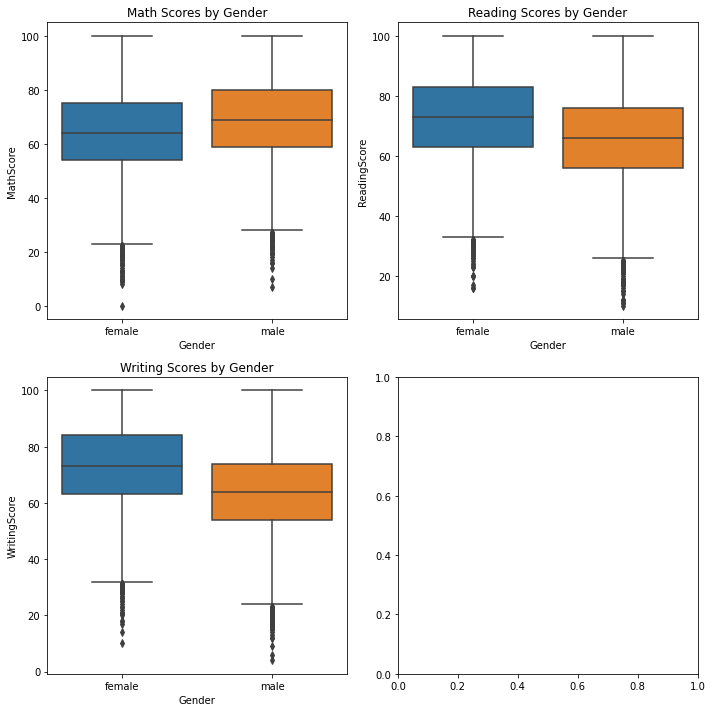

In [28]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df, x='Gender', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df, x='Gender', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df, x='Gender', y='WritingScore')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by Gender')
axes[0, 1].set_title('Reading Scores by Gender')
axes[1, 0].set_title('Writing Scores by Gender')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Parent Educ. / Test Score Viz

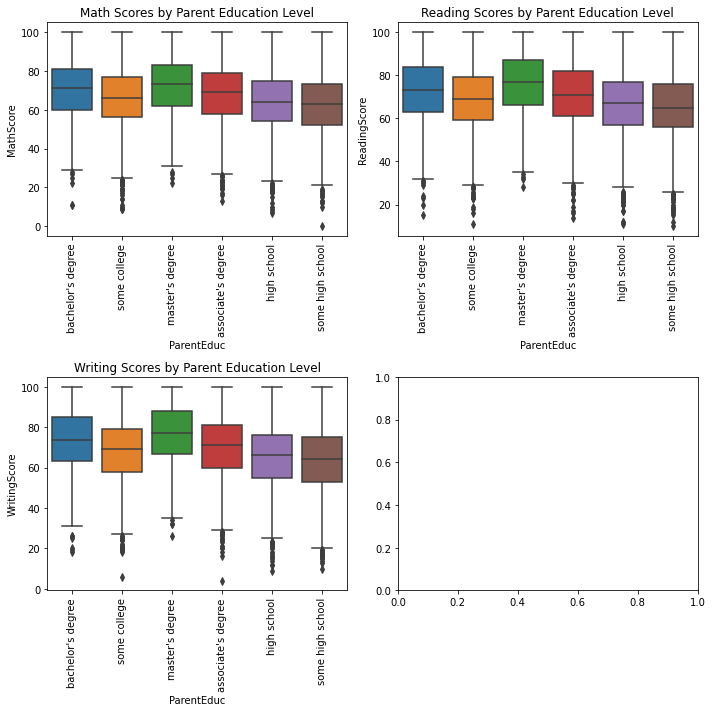

In [29]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df, x='ParentEduc', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df, x='ParentEduc', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df, x='ParentEduc', y='WritingScore')


# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# add titles to each subplot
axes[0, 0].set_title('Math Scores by Parent Education Level')
axes[0, 1].set_title('Reading Scores by Parent Education Level')
axes[1, 0].set_title('Writing Scores by Parent Education Level')


# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Ethnic Group / Test Score Viz

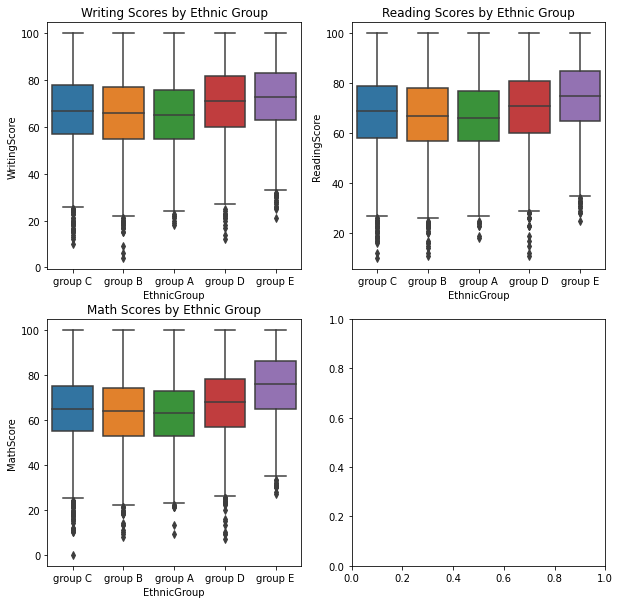

In [30]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (10,10))

sns.boxplot(ax = axes[0,0], data = df, x = "EthnicGroup", y = "WritingScore")
sns.boxplot(ax = axes[0,1], data = df, x = "EthnicGroup", y = "ReadingScore")
sns.boxplot(ax=axes[1,0], data = df, x = "EthnicGroup", y = "MathScore")

axes[0,0].set_title("Writing Scores by Ethnic Group")
axes[0,1].set_title("Reading Scores by Ethnic Group")
axes[1,0].set_title("Math Scores by Ethnic Group")

plt.show()

### Lunch Type / Test Score Viz

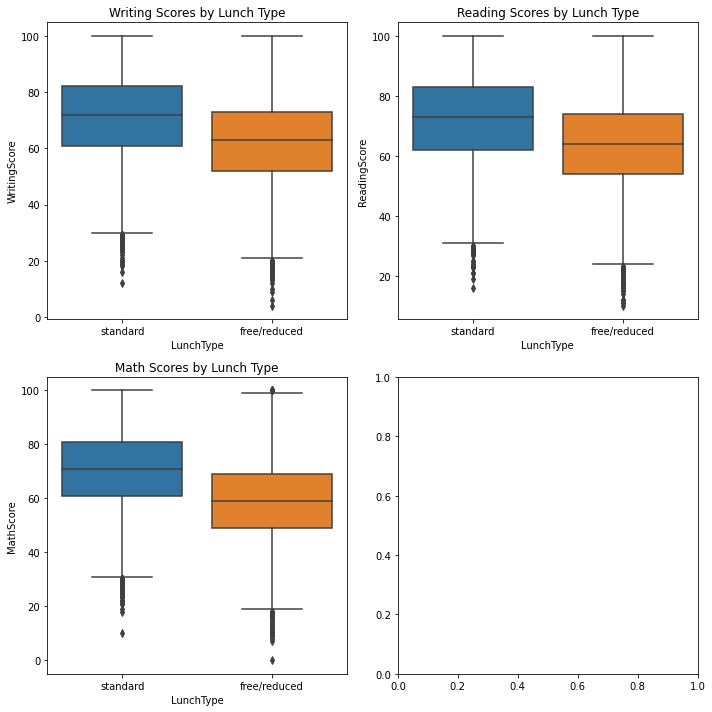

In [31]:
# create 2x2 subplot 
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

# create boxplot for each var within each plot
sns.boxplot(ax = axes[0,0], data = df, x = "LunchType", y = "WritingScore")
sns.boxplot(ax = axes[0,1], data = df, x = "LunchType", y = "ReadingScore")
sns.boxplot(ax = axes[1,0], data = df, x= "LunchType", y = "MathScore")

# add titles
axes[0,0].set_title("Writing Scores by Lunch Type")
axes[0,1].set_title("Reading Scores by Lunch Type")
axes[1,0].set_title("Math Scores by Lunch Type")

plt.tight_layout()

plt.show()

### Test Prep / Test Score Viz

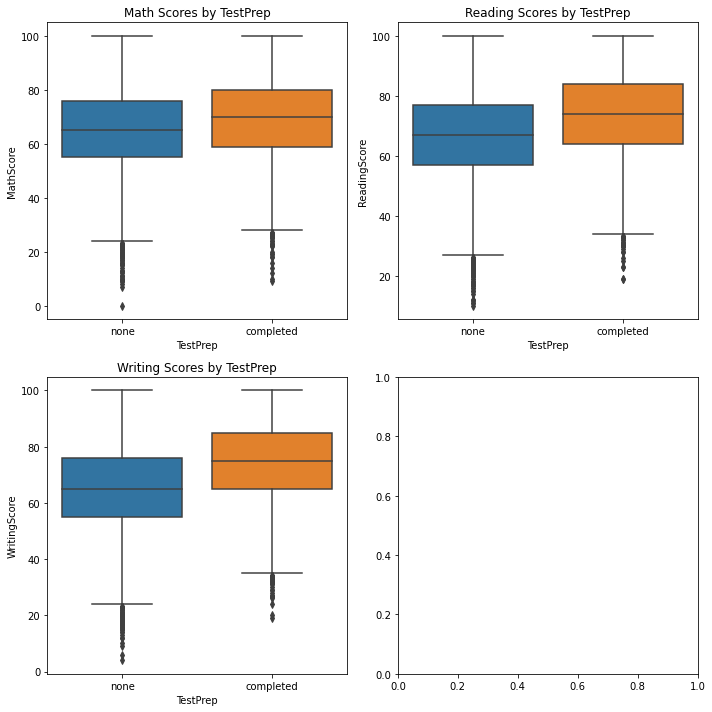

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.boxplot(ax=axes[0,0], data = df, x = "TestPrep", y = "MathScore")
sns.boxplot(ax = axes[0,1], data = df, x = "TestPrep", y = "ReadingScore")
sns.boxplot(ax=axes[1,0], data = df, x = "TestPrep", y = "WritingScore")

axes[0,0].set_title("Math Scores by TestPrep")
axes[0,1].set_title("Reading Scores by TestPrep")
axes[1,0].set_title("Writing Scores by TestPrep")

plt.tight_layout()

plt.show()

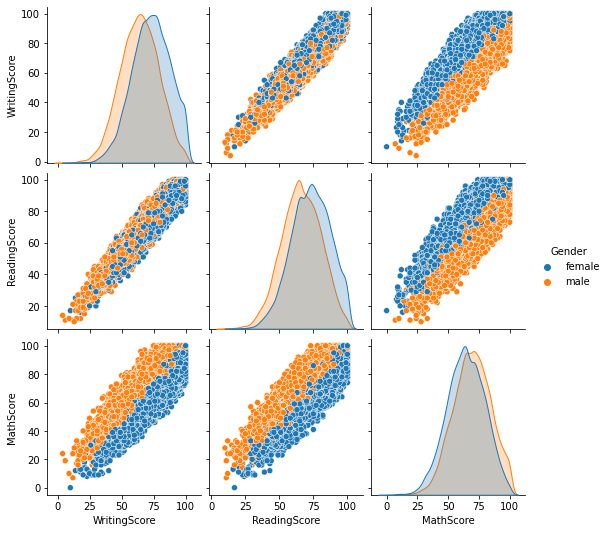

In [33]:
sns.pairplot(df[["WritingScore", "ReadingScore","MathScore", "Gender"]], hue= "Gender")
plt.show()

### <span style = "color:blue"> E) Explore relationships between attributes: look at the attributes via scatterplot, correlation, cross-tabulation, group-wise averages, etc. as appropriate.</span>

*explain any interesting relationships*

In [34]:
df.groupby("EthnicGroup")["MathScore"].mean()

EthnicGroup
group A    62.991888
group B    63.490216
group C    64.695723
group D    67.666400
group E    75.298936
Name: MathScore, dtype: float64

In [35]:
df.groupby("EthnicGroup")["ReadingScore"].mean()

EthnicGroup
group A    66.787742
group B    67.320460
group C    68.438233
group D    70.382247
group E    74.251423
Name: ReadingScore, dtype: float64

In [36]:
df.groupby("EthnicGroup")["WritingScore"].mean()

EthnicGroup
group A    65.251915
group B    65.895125
group C    66.999240
group D    70.890844
group E    72.677060
Name: WritingScore, dtype: float64

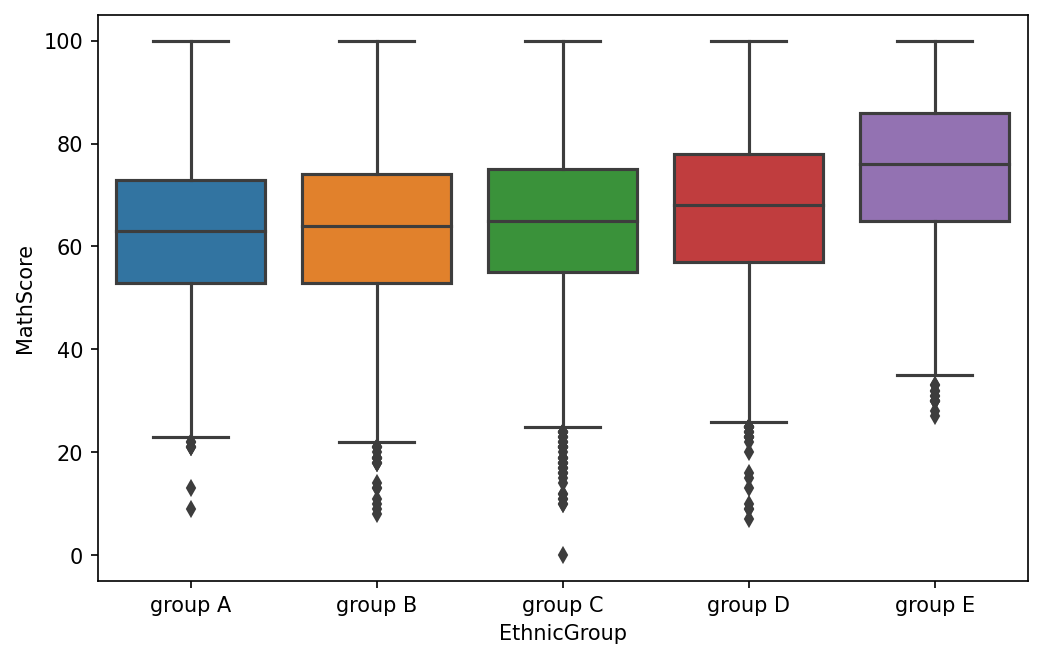

In [37]:
# Reorder EthnicGroup col
df['EthnicGroup'] = df['EthnicGroup'].astype('category')
df["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E"])

# Visualize Boxplot
plt.figure(figsize= (8,5), dpi = 150)
sns.boxplot(data = df , x = "EthnicGroup", y = "MathScore")
plt.show()

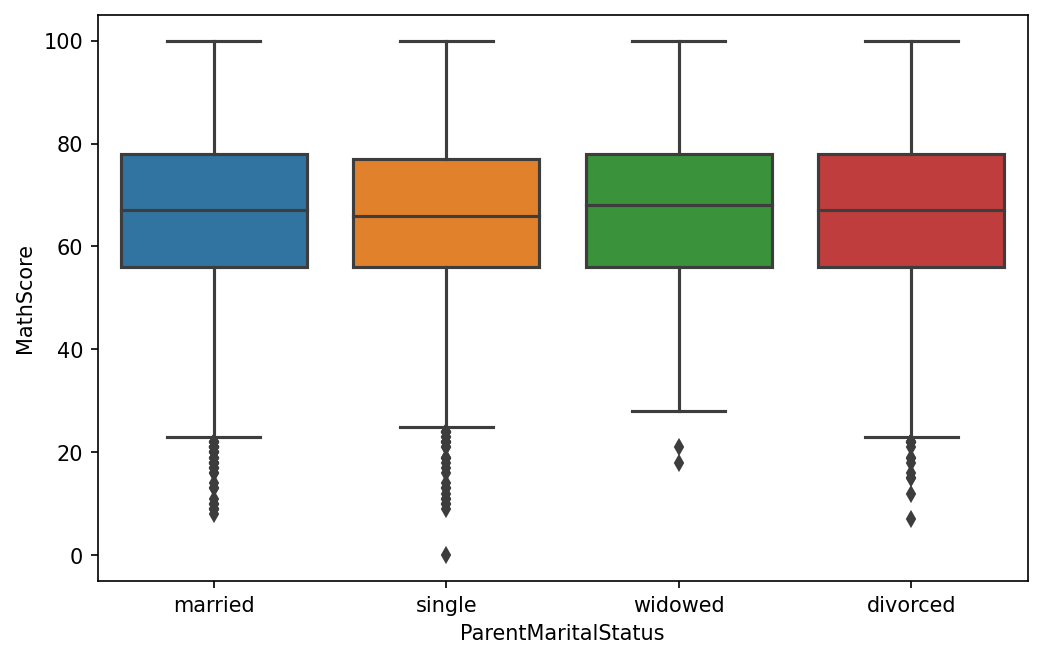

In [38]:
plt.figure(figsize= (8,5), dpi = 150)
sns.boxplot(data = df , x = "ParentMaritalStatus", y = "MathScore")
plt.show()

### <span style = "color:blue">F) Are there other features that could be added to the data or created from existing features? which ones?</span> 

Features that could be added to the data:
1) School (or geographic location/district)
2) Teacher (or class) 
3) Extracurricular Activities (other than sport specifically)
4) Parent Household Income
5) Work with Tutor
6) Teacher offers tutoring
7) Age
8) participant in "student government" 
9) parent participation in PTA
10) class or school average GPA
11) student GPA

Features that can be created from existing features:
1) Column "Has Siblings" can be created with "only child" or "sibling" as attributes if a student has no siblings/has siblings as reported by nrsiblings

2) Pass/Fail for Math/Reading/Writing can be created by creating levels of score data (>=70 : pass, <70 : Fail) 
*this is not very helpful*

In [39]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"

In [40]:
new_df["MathResult"] = new_df["MathScore"].apply(pass_fail)


In [41]:
new_df["ReadingResult"] = new_df["ReadingScore"].apply(pass_fail)


In [42]:
new_df["WritingResult"] = new_df["WritingScore"].apply(pass_fail)


In [43]:
# new dfs with/without object type
df_obj = new_df.select_dtypes(include = "object")
df_num = new_df.select_dtypes(exclude = "object")

In [44]:
# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")
    

Unique values in column 'MathResult':['Pass' 'Fail']
Unique values in column 'ReadingResult':['Pass' 'Fail']
Unique values in column 'WritingResult':['Pass' 'Fail']


In [45]:
    # creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)


In [46]:
# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

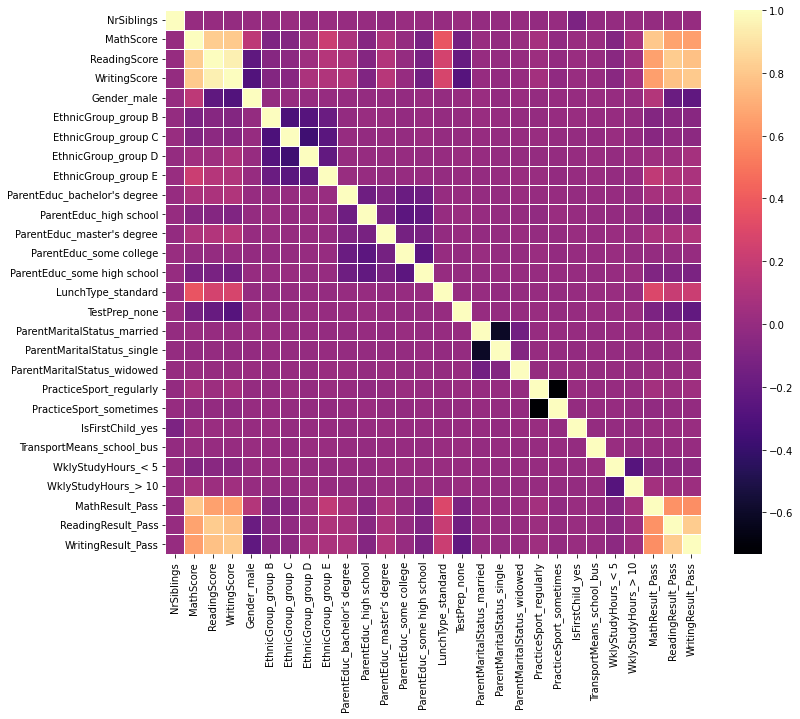

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=.5)
plt.show()

In [48]:
def has_siblings(nrsiblings):
    if nrsiblings == 0:
        return "only child"
    else:
        return "siblings"

In [49]:
new_df["HasSiblings"] = df["NrSiblings"].apply(has_siblings)

In [50]:
# new dfs with/without object type
df_obj = new_df.select_dtypes(include = "object")
df_num = new_df.select_dtypes(exclude = "object")

In [51]:
# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")
    

Unique values in column 'HasSiblings':['siblings' 'only child']


In [52]:
    # creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)


In [53]:
# combining into one df
new_df = pd.concat([df_num, df_obj], axis = 1)

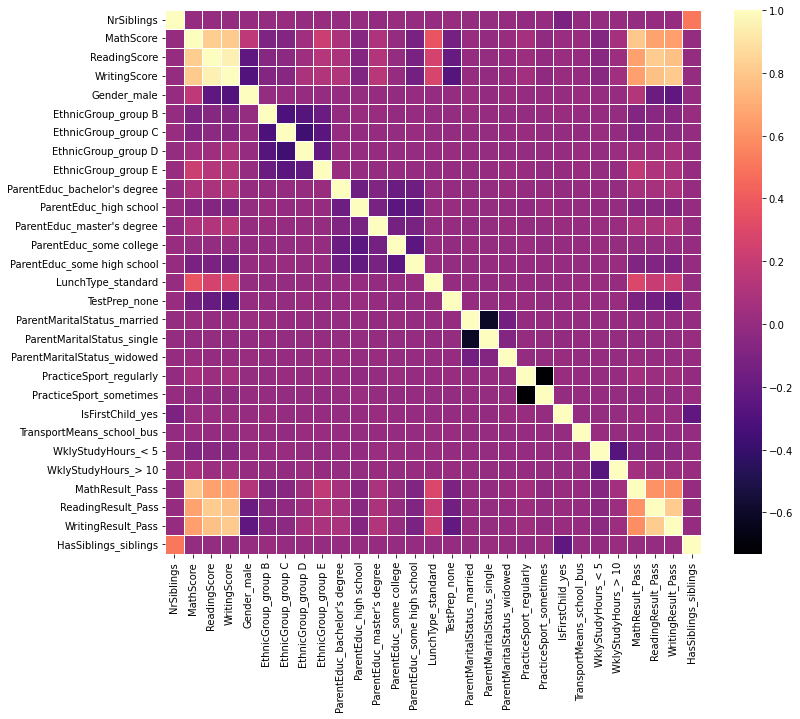

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),cmap = "magma", linecolor='white', linewidths=.5)
plt.show()

<hr>

## <center>BONUS</center>

<hr>

### <span style = "color:blue">Provide Additional Analyses.</span> 
*one idea: implement dimensinoality reduction, then visualize and interpret the results.*
#### <span style = "color:red">*note, I tried running PCA... but it didn't look like anything beneficial. This is likely becaue the data we are working with is mostly categorical variables and even though the variables have been encoded (one-hot) PCA was not meant to work with this type of data. MCA would be a more effective alternative, but we must understand that we lose the interpretation that we would have had with PCA variables. </span>